In [1]:
import tensorflow as tf

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2024-03-11 21:16:02.377388: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 21:16:02.593101: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 21:16:02.595010: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-11 21:16:04.104246: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


In [2]:
x = np.array([-1, 0, 1, 2, 3, 4], dtype=float)
y = np.array([-3, -1, 1, 3, 5, 7], dtype=float)
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
# sgd = stochastic gradient descent
model.compile(optimizer="sgd", loss="mean_squared_error")
model.fit(x, y, epochs=500)  # epochs = number of iterations
print(model.predict([10.0]))

Epoch 1/500
1/1 [==============================] - 1s 670ms/step - loss: 8.2094
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 6.6577
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 5.4328
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 4.4652
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 3.6999
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 3.0940
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 2.6136
Epoch 8/500
1/1 [==============================] - 0s 9ms/step - loss: 2.2319
Epoch 9/500
1/1 [==============================] - 0s 23ms/step - loss: 1.9280
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 1.6854
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 1.4910
Epoch 12/500
1/1 [==============================] - 0s 8ms/step - loss: 1.3347
Epoch 13/500
1/1 [==============================] - 0s 7m

Imagine that house pricing is as easy as:

A house has a base cost of 50k, and every additional bedroom adds a cost of 50k. This will make a 1 bedroom house cost 100k, a 2 bedroom house cost 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.


In [3]:
def house_model():
    # START CODE HERE

    # Define input and output tensors with the values for houses with 1 up to 6 bedrooms
    # Hint: Remember to explictly set the dtype as float
    xs = np.array([1, 2, 3, 4, 5, 6], dtype=float)
    ys = 50 + 50 * xs

    # Define your model (should be a model with 1 dense layer and 1 unit)
    # Note: you can use `tf.keras` instead of `keras`
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

    # Compile your model
    # Set the optimizer to Stochastic Gradient Descent
    # and use Mean Squared Error as the loss function
    model.compile(optimizer="sgd", loss="mean_squared_error")

    # Train your model for 1000 epochs by feeding the i/o tensors
    model.fit(xs, ys, epochs=1000)

    # END CODE HERE
    return model


model = house_model()

new_x = 7.0
prediction = model.predict([new_x])[0]
print(prediction)

Epoch 1/1000
1/1 [==============================] - 0s 378ms/step - loss: 58238.0352
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 27088.6719
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 12670.8311
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 5996.8501
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 2906.9675
Epoch 6/1000
1/1 [==============================] - 0s 8ms/step - loss: 1475.9181
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 812.6358
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 504.7043
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 361.2481
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 293.9222
Epoch 11/1000
1/1 [==============================] - 0s 8ms/step - loss: 261.8383
Epoch 12/1000
1/1 [==============================] - 0s 7ms/step - loss: 246.0725
Epoch 13/100

## Computer Vision

In [4]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

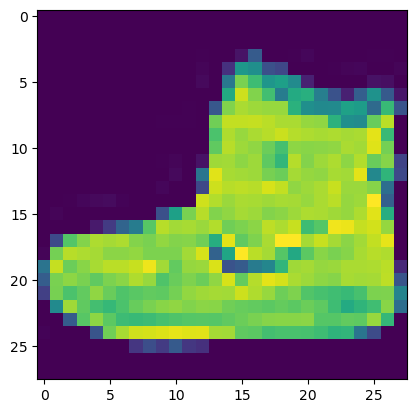

In [5]:
# Visualize the image
index = 0

plt.imshow(training_images[index])

plt.show()

In [6]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

In [7]:
# Build the classification model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)


model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5043 - accuracy: 0.8225
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3781 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3377 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3160 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2981 - accuracy: 0.8915


In [8]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3710 - accuracy: 0.8643


[0.37101563811302185, 0.864300012588501]

In [9]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 3ms/step
[2.2815668e-06 5.8733836e-09 1.0659695e-06 3.5211929e-09 1.9558529e-07
 1.7644032e-03 3.6354825e-06 3.3064499e-02 8.2649386e-08 9.6516377e-01]


In [10]:
print(test_labels[0])

9


In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        '''
        Halts the training when the loss falls below 0.4

        Args:
          epoch (integer) - index of epoch (required but unused in the function definition below)
          logs (dict) - metric results from the training epoch
        '''

        # Check the loss
        if (logs.get('loss') < 0.4):

            # Stop if threshold is met
            print("\nLoss is lower than 0.4 so cancelling training!")
            self.model.stop_training = True


# Instantiate class
callbacks = myCallback()


# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model with a callback
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4764 - accuracy: 0.8305
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3606 - accuracy: 0.8686
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3606 - accuracy: 0.8686


In [13]:
# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
    # Define the correct function signature for on_epoch_end
    def on_epoch_end(self, epoch, logs=None):
        if logs.get("accuracy") is not None and logs.get("accuracy") > 0.89:
            print("\nReached 89% accuracy so cancelling training!")

            # Stop training once the above condition is met
            self.model.stop_training = True


def train_mnist(x_train, y_train):

    # START CODE HERE

    # Instantiate the callback class
    callbacks = myCallback()

    # Define the model
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax),
        ]
    )

    # Compile the model
    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )

    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

    # END CODE HERE

    return history


hist = train_mnist(training_images, training_labels)

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4751 - accuracy: 0.8303
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3579 - accuracy: 0.8683
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3223 - accuracy: 0.8818
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3000 - accuracy: 0.8878
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.2807 - accuracy: 0.8968
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 23s 13ms/step - loss: 0.2809 - accuracy: 0.8967


In [14]:
# Define the model
model = tf.keras.models.Sequential([

    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Add the same layers as before
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

1/1 [==============================] - 0s 39ms/step


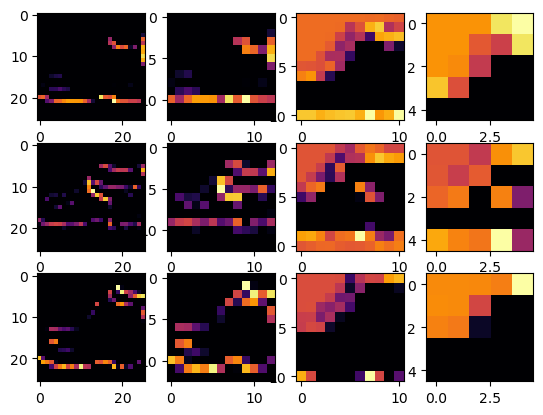

In [15]:
from tensorflow.keras import models

f, axarr = plt.subplots(3, 4)

FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(
    inputs=model.input, outputs=layer_outputs)

for x in range(0, 4):
    f1 = activation_model.predict(
        test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0, x].grid(False)

    f2 = activation_model.predict(
        test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1, x].grid(False)

    f3 = activation_model.predict(
        test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2, x].grid(False)

In [17]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2024-03-11 16:50:53--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.39.123, 142.250.179.155, 142.251.36.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.39.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  31.8MB/s    in 5.1s    

2024-03-11 16:50:58 (28.1 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [24]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-03-11 17:09:54--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.179.187, 172.217.23.219, 142.250.179.219, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.179.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  12.7MB/s    in 0.9s    

2024-03-11 17:09:55 (12.7 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [18]:
import zipfile

# Unzip the dataset
local_zip = "./horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("./horse-or-human")
zip_ref.close()

In [25]:
# Unzip validation set
local_zip = "./validation-horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("./validation-horse-or-human")

zip_ref.close()

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1 / 255)
validation_datagen = ImageDataGenerator(rescale=1 / 255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "./horse-or-human/",  # This is the source directory for training images
    target_size=(300, 300),  # All images will be resized to 300x300
    batch_size=128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode="binary",
)


# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    # This is the source directory for validation images
    "./validation-horse-or-human/",
    target_size=(300, 300),  # All images will be resized to 300x300
    batch_size=32,
    # Since you use binary_crossentropy loss, you need binary labels
    class_mode="binary",
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [3]:
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential(
    [
        # Note the input shape is the desired size of the image 300x300 with 3 bytes color
        # This is the first convolution
        tf.keras.layers.Conv2D(
            16, (3, 3), activation="relu", input_shape=(300, 300, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation="relu"),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)


model.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)


history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8,
)

Epoch 1/15


2024-03-11 21:18:00.134235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-03-11 21:18:02.895935: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 727482368 exceeds 10% of free system memory.
2024-03-11 21:18:08.505891: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 727482368 exceeds 10% of free system memory.


1/8 [==>...........................] - ETA: 1:09 - loss: 0.6915 - accuracy: 0.5625

2024-03-11 21:18:10.081851: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 727482368 exceeds 10% of free system memory.
2024-03-11 21:18:15.376176: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 727482368 exceeds 10% of free system memory.


2/8 [======>.......................] - ETA: 42s - loss: 1.1213 - accuracy: 0.5352 

2024-03-11 21:18:17.167965: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 727482368 exceeds 10% of free system memory.


8/8 [==============================] - ETA: 0s - loss: 0.8126 - accuracy: 0.5606

2024-03-11 21:18:51.401033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 55s 6s/step - loss: 0.8126 - accuracy: 0.5606 - val_loss: 0.6819 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 53s 7s/step - loss: 0.6827 - accuracy: 0.5729 - val_loss: 0.6478 - val_accuracy: 0.6250
Epoch 3/15
8/8 [==============================] - 62s 8s/step - loss: 0.6819 - accuracy: 0.6129 - val_loss: 3.4250 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 59s 7s/step - loss: 0.8076 - accuracy: 0.7742 - val_loss: 0.5139 - val_accuracy: 0.7695
Epoch 5/15
8/8 [==============================] - 57s 7s/step - loss: 0.4586 - accuracy: 0.8154 - val_loss: 0.4957 - val_accuracy: 0.8359
Epoch 6/15
8/8 [==============================] - 60s 7s/step - loss: 0.4436 - accuracy: 0.8065 - val_loss: 1.6534 - val_accuracy: 0.7227
Epoch 7/15
8/8 [==============================] - 56s 7s/step - loss: 0.3969 - accuracy: 0.8486 - val_loss: 1.7748 - val_accuracy: 0.7461
Epoch 8/15
8/8 [=============================

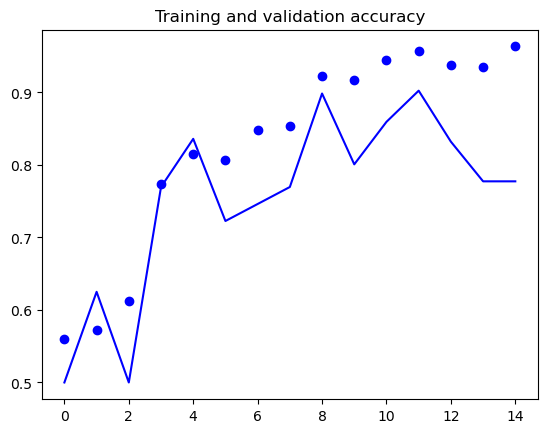

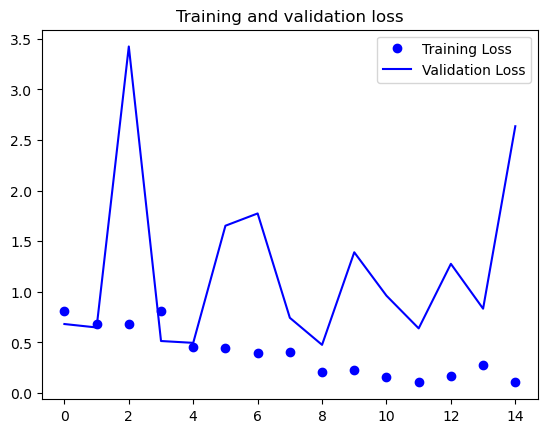

In [4]:
def plot_loss_acc(history):
    """Plots the training and validation loss and accuracy from a history object"""
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(len(acc))

    plt.plot(epochs, acc, "bo", label="Training accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")

    plt.figure()

    plt.plot(epochs, loss, "bo", label="Training Loss")
    plt.plot(epochs, val_loss, "b", label="Validation Loss")
    plt.title("Training and validation loss")
    plt.legend()

    plt.show()


plot_loss_acc(history)

## Data Augmentation

In [9]:
# Create new model
model_for_aug = tf.keras.models.Sequential(
    [
        # Note the input shape is the desired size of the image 300x300 with 3 bytes color
        # This is the first convolution
        tf.keras.layers.Conv2D(
            16, (3, 3), activation="relu", input_shape=(300, 300, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation="relu"),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

model_for_aug.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop(learning_rate=0.001),
    metrics=["accuracy"],
)


# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "./horse-or-human/",  # This is the source directory for training images
    target_size=(300, 300),  # All images will be resized to 150x150
    batch_size=20,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode="binary",
)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
    "./validation-horse-or-human/",
    target_size=(300, 300),
    batch_size=20,
    class_mode="binary",
)

# Train the new model
history_with_aug = model_for_aug.fit(
    train_generator,
    steps_per_epoch=8,  # 2000 images = batch_size * steps
    epochs=15,
    validation_data=validation_generator,
    validation_steps=8,  # 1000 images = batch_size * steps
    verbose=2,
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/15


2024-03-11 21:45:01.990694: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-03-11 21:45:13.875757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 - 14s - loss: 0.8967 - accuracy: 0.5375 - val_loss: 0.6895 - val_accuracy: 0.5188 - 14s/epoch - 2s/step
Epoch 2/15
8/8 - 13s - loss: 0.6936 - accuracy: 0.4812 - val_loss: 0.6886 - val_accuracy: 0.5312 - 13s/epoch - 2s/step
Epoch 3/15
8/8 - 12s - loss: 0.6911 - accuracy: 0.5034 - val_loss: 0.6873 - val_accuracy: 0.7625 - 12s/epoch - 2s/step
Epoch 4/15
8/8 - 13s - loss: 0.7105 - accuracy: 0.4812 - val_loss: 0.6880 - val_accuracy: 0.5312 - 13s/epoch - 2s/step
Epoch 5/15
8/8 - 12s - loss: 0.6880 - accuracy: 0.5782 - val_loss: 0.7232 - val_accuracy: 0.4688 - 12s/epoch - 2s/step
Epoch 6/15
8/8 - 13s - loss: 0.6693 - accuracy: 0.5875 - val_loss: 0.7727 - val_accuracy: 0.5063 - 13s/epoch - 2s/step
Epoch 7/15
8/8 - 12s - loss: 0.7224 - accuracy: 0.5875 - val_loss: 0.6638 - val_accuracy: 0.8500 - 12s/epoch - 1s/step
Epoch 8/15
8/8 - 11s - loss: 0.6578 - accuracy: 0.6375 - val_loss: 0.6565 - val_accuracy: 0.4938 - 11s/epoch - 1s/step
Epoch 9/15
8/8 - 10s - loss: 0.6743 - accuracy: 0.5646 - va

In [ ]:
plot_loss_acc(history_with_aug)


the training accuracy has gone down compared to the baseline. This is expected because (as a result of data augmentation) there are more variety in the images so the model will need more runs to learn from them. The good thing is the validation accuracy is no longer stalling and is more in line with the training results. This means that the model is now performing better on unseen data.

In [ ]:
classes = model.predict(images, batch_size=10)
print(classes[0])

if classes[0]>0.5:
    print(fn + " is a human")
else:
    print(fn + " is a horse")

In [35]:
import numpy as np

# from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import os
import glob

validation_horse_dir = os.path.join("./validation-horse-or-human/horses")
validation_horse_hames = os.listdir(validation_horse_dir)

for fn in validation_horse_hames:

    # predicting images
    path = os.path.join(validation_horse_dir, fn)
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])

    if classes[0] > 0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")

1/1 [==============================] - 0s 35ms/step
[0.50533926]
horse5-060.png is a human
1/1 [==============================] - 0s 65ms/step
[0.39088556]
horse1-510.png is a horse
1/1 [==============================] - 0s 25ms/step
[0.45797282]
horse6-198.png is a horse
1/1 [==============================] - 0s 40ms/step
[0.48062184]
horse5-259.png is a horse
1/1 [==============================] - 0s 39ms/step
[0.23324117]
horse3-584.png is a horse
1/1 [==============================] - 0s 37ms/step
[0.500299]
horse4-389.png is a human
1/1 [==============================] - 0s 37ms/step
[0.45983103]
horse1-122.png is a horse
1/1 [==============================] - 0s 33ms/step
[0.4549614]
horse4-000.png is a horse
1/1 [==============================] - 0s 47ms/step
[0.669657]
horse2-136.png is a human
1/1 [==============================] - 0s 40ms/step
[0.45571494]
horse5-018.png is a horse
1/1 [==============================] - 0s 36ms/step
[0.17287067]
horse1-224.png is a horse
1/1 

In [29]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join("./horse-or-human/horses")

# Directory with training human pictures
train_human_dir = os.path.join("./horse-or-human/humans")

# Directory with validation horse pictures
validation_horse_dir = os.path.join("./validation-horse-or-human/horses")

# Directory with validation human pictures
validation_human_dir = os.path.join("./validation-horse-or-human/humans")

train_horse_names = os.listdir(train_horse_dir)
print(f"TRAIN SET HORSES: {train_horse_names[:10]}")

train_human_names = os.listdir(train_human_dir)
print(f"TRAIN SET HUMANS: {train_human_names[:10]}")

validation_horse_hames = os.listdir(validation_horse_dir)
print(f"VAL SET HORSES: {validation_horse_hames[:10]}")

validation_human_names = os.listdir(validation_human_dir)
print(f"VAL SET HUMANS: {validation_human_names[:10]}")


print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(
    f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(
    f'total validation human images: {len(os.listdir(validation_human_dir))}')

TRAIN SET HORSES: ['horse32-2.png', 'horse33-0.png', 'horse28-1.png', 'horse23-0.png', 'horse11-8.png', 'horse34-9.png', 'horse43-6.png', 'horse15-1.png', 'horse09-4.png', 'horse29-3.png']
TRAIN SET HUMANS: ['human04-29.png', 'human07-09.png', 'human16-03.png', 'human16-14.png', 'human04-20.png', 'human04-05.png', 'human09-28.png', 'human01-08.png', 'human13-16.png', 'human13-19.png']
VAL SET HORSES: ['horse5-060.png', 'horse1-510.png', 'horse6-198.png', 'horse5-259.png', 'horse3-584.png', 'horse4-389.png', 'horse1-122.png', 'horse4-000.png', 'horse2-136.png', 'horse5-018.png']
VAL SET HUMANS: ['valhuman05-15.png', 'valhuman02-10.png', 'valhuman05-12.png', 'valhuman01-24.png', 'valhuman01-13.png', 'valhuman01-22.png', 'valhuman01-17.png', 'valhuman05-26.png', 'valhuman02-21.png', 'valhuman01-20.png']
total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128
